# Data Collection and Preparation

In [3]:
import pandas as pd

# Loading the dataset
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Check for missing values

In [4]:
missing_values = sleep_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

There seems to be no missing values in this dataset, so we can continue.

### Tidying the dataset
In order to make this dataset suitable for modelling, we can use encoding the categorical variables. For occupation and BMI, we'll use on-hot encoding. For gender and sleep disorder, we'll use label encoding. This is method of tidying our data.

In [5]:
# One-hot encoding for Occupation and BMI Category columns
sleep_data = pd.get_dummies(sleep_data, columns=['Occupation', 'BMI Category'], drop_first=True)

# Manually encoding Gender and Sleep Disorder columns
sleep_data['Gender'] = sleep_data['Gender'].map({'Male': 1, 'Female': 0})
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].map(lambda x: 0 if x == 'None' else 1)

# Splitting Blood Pressure into Systolic and Diastolic
sleep_data['Systolic BP'], sleep_data['Diastolic BP'] = sleep_data['Blood Pressure'].str.split('/').str
sleep_data['Systolic BP'] = sleep_data['Systolic BP'].astype(int)
sleep_data['Diastolic BP'] = sleep_data['Diastolic BP'].astype(int)

# Dropping the original Blood Pressure column
sleep_data.drop(columns=['Blood Pressure'], inplace=True)

# Displaying the first few rows of the processed dataset
sleep_data.head()

/var/folders/qf/mt3btt353xndvbt6mcv4mnc40000gn/T/ipykernel_45392/1457080319.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  sleep_data['Systolic BP'], sleep_data['Diastolic BP'] = sleep_data['Blood Pressure'].str.split('/').str


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic BP,Diastolic BP
0,1,1,27,6.1,6,42,6,77,4200,0,...,0,0,0,1,0,0,0,1,126,83
1,2,1,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
2,3,1,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
3,4,1,28,5.9,4,30,8,85,3000,1,...,1,0,0,0,0,0,1,0,140,90
4,5,1,28,5.9,4,30,8,85,3000,1,...,1,0,0,0,0,0,1,0,140,90


# Exploratory Analysis

In [6]:
descriptive_statistics = sleep_data.describe()
descriptive_statistics

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.414439,...,0.005348,0.085561,0.010695,0.010695,0.106952,0.056150,0.026738,0.395722,128.553476,84.649733
std,108.108742,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.493285,...,0.073029,0.280090,0.103001,0.103001,0.309466,0.230519,0.161533,0.489660,7.748118,6.161611
min,1.000000,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,142.000000,95.000000


Looking at these statistics, here are some observations we notice:
 - Age: The age of individuals ranges from 27 to 59, with a mean of 42.
 - Sleep Duration: Sleep duration varies from 5.8 to 8.5 hours, with a mean of 7.13 hours.
 - Quality of Sleep: Quality of sleep is rated on a scale, with a mean value of 7.31.
 - Physical Activity Level: This feature has a mean value of 59.17, with a minimum of 30 and a maximum of 90.
 - Stress Level: Stress level ranges from 3 to 8, with a mean value of 5.39.
 - Heart Rate: The mean heart rate is around 70 beats per minute.
 - Daily Steps: The daily steps range from 3000 to 10000, with a mean of 6816.
 - Blood Pressure: Systolic blood pressure ranges from 115 to 142, and diastolic ranges from 75 to 95.


### Visualization

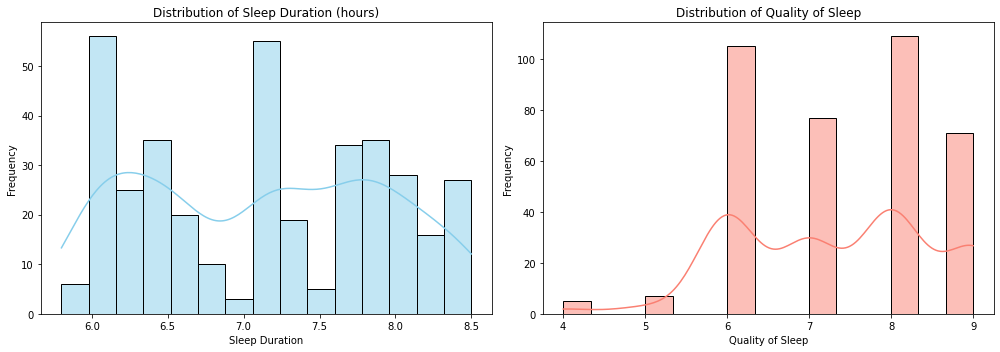

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the distribution of Sleep Duration
sns.histplot(sleep_data['Sleep Duration'], kde=True, ax=axes[0], bins=15, color='skyblue')
axes[0].set_title('Distribution of Sleep Duration (hours)')
axes[0].set_xlabel('Sleep Duration')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of Quality of Sleep
sns.histplot(sleep_data['Quality of Sleep'], kde=True, ax=axes[1], bins=15, color='salmon')
axes[1].set_title('Distribution of Quality of Sleep')
axes[1].set_xlabel('Quality of Sleep')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

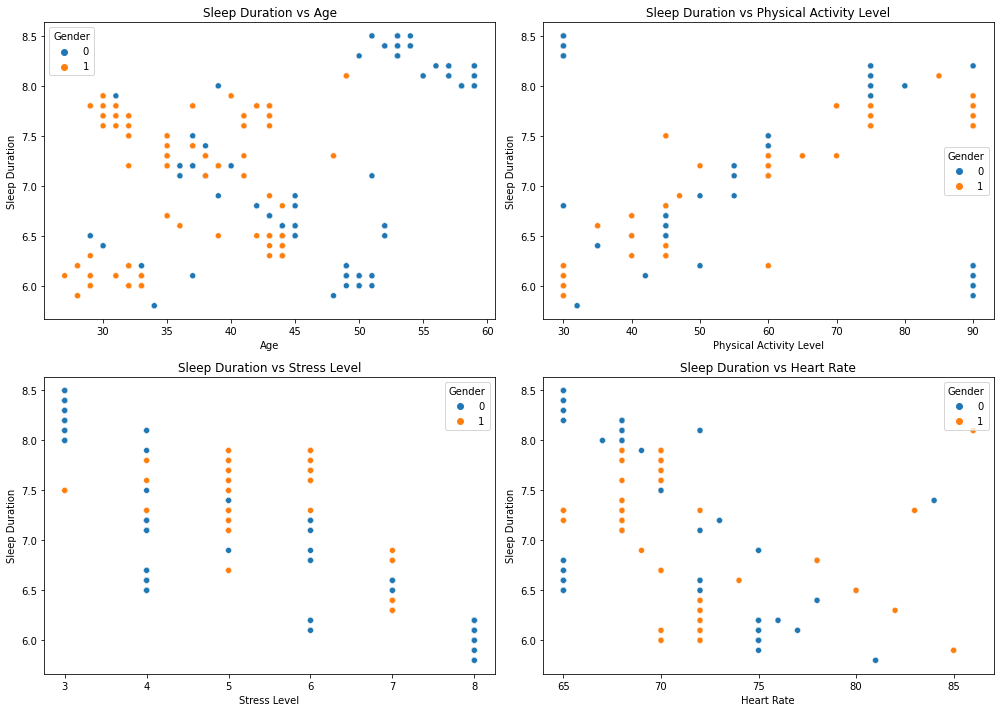

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Relationship between Sleep Duration and Age
sns.scatterplot(x='Age', y='Sleep Duration', hue='Gender', data=sleep_data, ax=axes[0, 0])
axes[0, 0].set_title('Sleep Duration vs Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Physical Activity Level
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', hue='Gender', data=sleep_data, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration vs Physical Activity Level')
axes[0, 1].set_xlabel('Physical Activity Level')
axes[0, 1].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Stress Level
sns.scatterplot(x='Stress Level', y='Sleep Duration', hue='Gender', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration vs Stress Level')
axes[1, 0].set_xlabel('Stress Level')
axes[1, 0].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Heart Rate
sns.scatterplot(x='Heart Rate', y='Sleep Duration', hue='Gender', data=sleep_data, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Duration vs Heart Rate')
axes[1, 1].set_xlabel('Heart Rate')
axes[1, 1].set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()

# Modelling